In [1]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import accuracy_score

In [2]:
import matplotlib.pyplot as plt
from keras.layers import Dense, Input, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adadelta, Adam, SGD
from tensorflow.keras.backend import clear_session

# CIFAR 10

In [3]:
train, test = tf.keras.datasets.mnist.load_data()
train_images, train_labels = train
valid_test_images, valid_test_labels = test
train_images = train_images / 255.
valid_test_images = valid_test_images / 255.
valid_images = valid_test_images[:5000]
valid_labels = valid_test_labels[:5000]
test_images = valid_test_images[5000:]
test_labels = valid_test_labels[5000:]
print(train_images.shape, valid_images.shape, test_images.shape)
print(train_labels.shape, valid_labels.shape, test_labels.shape)

(60000, 28, 28) (5000, 28, 28) (5000, 28, 28)
(60000,) (5000,) (5000,)


In [4]:
img_rows = img_cols = 28
channels = 3

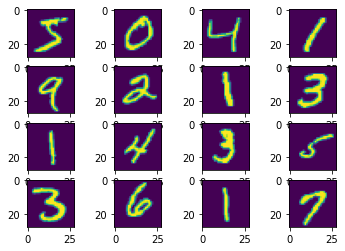

In [5]:
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(train_images[i])
plt.show()

In [6]:
def plot_history(history, title):
    plt.figure(figsize=(10,3))
    # Plot training & validation accuracy values
    plt.subplot(121)
    plt.plot(history.history['sparse_categorical_accuracy'])
    plt.plot(history.history['val_sparse_categorical_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(122)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

In [7]:
tf.compat.v1.reset_default_graph() 
clear_session()

input_layer = Input(shape=(img_rows, img_cols))
x = Flatten()(input_layer)
#x = Dense(units=10_000, activation='relu')(x)
x = Dense(units=200, activation="relu", use_bias=False)(x)
x = Dense(units=80, activation="relu", use_bias=False)(x)

prediction_layer = Dense(10, activation='softmax', use_bias=False)(x)

model = Model(inputs=input_layer, outputs=prediction_layer)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 200)               156800    
                                                                 
 dense_1 (Dense)             (None, 80)                16000     
                                                                 
 dense_2 (Dense)             (None, 10)                800       
                                                                 
Total params: 173,600
Trainable params: 173,600
Non-trainable params: 0
_________________________________________________________________


In [8]:
#loss = sparse_categorical_crossentropy 
#optimizer = SGD(momentum=0.9)
#model.compile(optimizer=optimizer, loss=loss, metrics=['sparse_categorical_accuracy'])
#model.save("mnist_before_training.h5")

In [ ]:
loss = sparse_categorical_crossentropy 
optimizer = MaskingSGD()
model.compile(optimizer=optimizer, loss=loss, metrics=['sparse_categorical_accuracy'])
model.save("mnist_before_training_maskingsgd.h5")

In [9]:
history = model.fit(x=train_images, y=train_labels, validation_data=(valid_images, valid_labels), epochs=30)

Epoch 1/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2692 - sparse_categorical_accuracy: 0.9206 - val_loss: 0.1696 - val_sparse_categorical_accuracy: 0.9460
Epoch 2/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1101 - sparse_categorical_accuracy: 0.9663 - val_loss: 0.1537 - val_sparse_categorical_accuracy: 0.9544
Epoch 3/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0749 - sparse_categorical_accuracy: 0.9773 - val_loss: 0.1270 - val_sparse_categorical_accuracy: 0.9596
Epoch 4/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0570 - sparse_categorical_accuracy: 0.9827 - val_loss: 0.1027 - val_sparse_categorical_accuracy: 0.9672
Epoch 5/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0430 - sparse_categorical_accuracy: 0.9867 - val_loss: 0.1023 - val_sparse_categorical_accuracy: 0.9682
Epoch 6/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0321 - spars

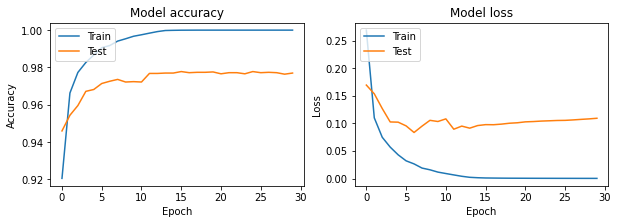

In [10]:
plot_history(history, "Dense")

In [11]:
y_pred = model.predict(test_images)

157/157 [==============================] - 0s 853us/step


In [12]:
model.evaluate(test_images, test_labels)

157/157 [==============================] - 0s 1ms/step - loss: 0.0444 - sparse_categorical_accuracy: 0.9888


[0.044442903250455856, 0.9887999892234802]

In [13]:
accuracy_score(np.argmax(y_pred, axis=1), test_labels)

0.9888

In [14]:
test_labels[:16]

array([3, 9, 9, 8, 4, 1, 0, 6, 0, 9, 6, 8, 6, 1, 1, 9], dtype=uint8)

IndexError: index 5000 is out of bounds for axis 0 with size 5000

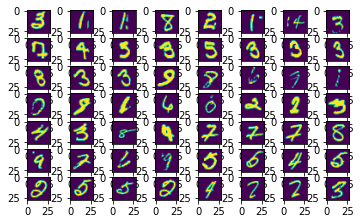

In [18]:
i = 0
j = 0
cols = rows = 8
while i < cols * rows:
    if test_labels[j] != np.argmax(y_pred[j]):
        plt.subplot(cols, rows, i + 1)
        plt.imshow(test_images[j])
        #plt.title(" ".join([str(np.argmax(y_pred[j])), str(test_labels[j])]))
        i += 1
    
    j += 1

In [16]:
np.argmax(y_pred[:16], axis=1)

array([3, 9, 9, 8, 4, 1, 0, 6, 0, 9, 6, 8, 6, 1, 1, 9], dtype=int64)

In [19]:
model.save("95_acc_mnist.h5")

In [3]:

from lottery.optimizer.SGD import MaskingSGD
cifar = keras.models.load_model("cifar10_before_training.h5")

loss = sparse_categorical_crossentropy 
optimizer = MaskingSGD()
cifar.compile(optimizer=optimizer, loss=loss, metrics=['sparse_categorical_accuracy'])
cifar.save("cifar_before_training_maskingsgd.h5")

NameError: name 'keras' is not defined